In [21]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [22]:
RESULT_DIR = 'data'
BLOCK_SIZE_Kb = 1.5
DELTA = 2

# Storage Evaluation

read

In [23]:

def vegetative_grow(block,delta,duration):
    """
        Vegatative growth of the blockchain
        @param block: empty block size of blockchain  in Kb
        @param delta: blockchain chain block generation rate
        @duration of the experiment

        return : total bytes of vegatative grow
    """
    # per_day = (block*60*60*24)/(1000*delta) #in megabytey
    per_sec = block*1024/delta
    total_bytes = per_sec * duration #bytes
    return total_bytes


space

In [24]:
exp = [ 
    {"block_size": 1.5, "delta" : 1},
    {"block_size": 1.5, "delta" : 2},
    {"block_size": 1.5, "delta" : 4},
    {"block_size": 1.5, "delta" : 8},
]

df_spc = pd.DataFrame(exp)

hour = 60 * 60
day = 24 * hour
month = 30 * day
year = 365 * day

#space in GB
df_spc['1_year'] = vegetative_grow(df_spc.block_size, df_spc.delta, year)/(1024*1024*1024)
df_spc['5_year'] = vegetative_grow(df_spc.block_size, df_spc.delta, 5 * year)/(1024*1024*1024)
df_spc['10_year'] = vegetative_grow(df_spc.block_size, df_spc.delta, 10 * year)/(1024*1024*1024)

df_spc

,block_size,delta,1_year,5_year,10_year
0,1.5,1,45.112610,225.563049,451.126099
1,1.5,2,22.556305,112.781525,225.563049
2,1.5,4,11.278152,56.390762,112.781525
3,1.5,8,5.639076,28.195381,56.390762


[Text(0, 0.5, 'Space in GB')]

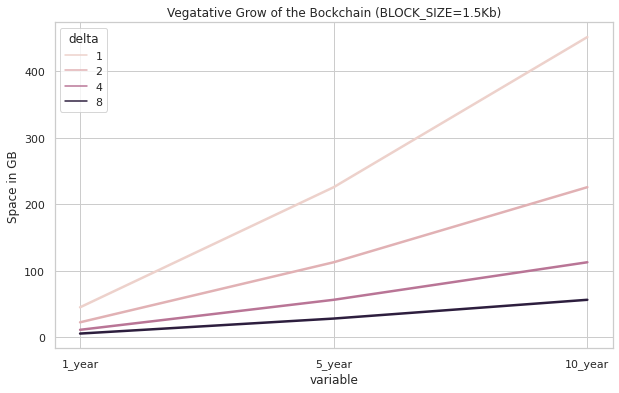

In [25]:
df_ = pd.melt(df_spc,id_vars=['block_size','delta'])

f, ax = plt.subplots(figsize=(10, 6))
sns.set_theme(style="whitegrid")

g = sns.lineplot(df_,x='variable',y='value',hue='delta',linewidth = 2.5)
g.set_title("Vegatative Grow of the Bockchain (BLOCK_SIZE=1.5Kb)")
ax.set(ylabel="Space in GB")
# ax.set_yscale("log")

execution

In [26]:
df_exec = pd.read_csv(RESULT_DIR +os.sep + 'exec_log.csv')

df_exec['vegetative_space'] = vegetative_grow(BLOCK_SIZE_Kb,DELTA,df_exec.time)

#convert to MB
df_exec.vegetative_space = df_exec.vegetative_space/(1024*1024)
df_exec.consumed_space = df_exec.consumed_space/(1024*1024)

df_exec['efective_space'] = df_exec.consumed_space - df_exec.vegetative_space 

df_exec['record_length'] = (df_exec.efective_space / df_exec.records) *1024 #kb
df_exec.record_length = df_exec.record_length.astype(int)

df_exec

,scenario,records,time,consumed_space,vegetative_space,efective_space,record_length
0,nopayload,1000,7123,88.922103,5.217041,83.705062,85
1,medium,1000,20193,498.919675,14.789795,484.129880,495
2,abstract,1000,19689,376.648172,14.420654,362.227518,370


In [27]:
df_ = df_exec.iloc[:,[0,-1]]
df_

,scenario,record_length
0,nopayload,85
1,medium,495
2,abstract,370


In [28]:
K_OBJ_YEAR = 7000000

def gen_scenario(df,n_obj_year):

    # df['year_1'] = 0
    # df['year_5'] = 0
    # df['year_10'] = 0

    df = df.assign(year_1=df.record_length * n_obj_year/(1024*1024*1024)) # to trabutes
    df = df.assign(year_5= (df.record_length * n_obj_year * 5)/(1024*1024*1024))
    df = df.assign(year_10=(df.record_length * n_obj_year * 10) / (1024*1024*1024)) 

    return df

[Text(0, 0.5, 'Storage in TB')]

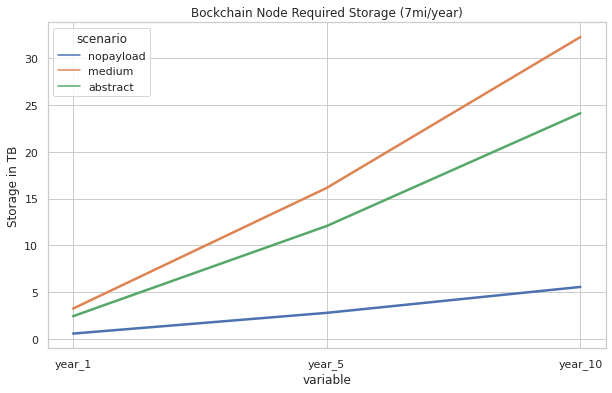

In [29]:
df_m = pd.melt(gen_scenario(df_,K_OBJ_YEAR),id_vars=['scenario','record_length'])

f, ax = plt.subplots(figsize=(10, 6))
sns.set_theme(style="whitegrid")

g = sns.lineplot(df_m,x='variable',y='value',hue='scenario',linewidth = 2.5)
g.set_title("Bockchain Node Required Storage (7mi/year)")
ax.set(ylabel="Storage in TB")
# ax.set_yscale("log")

[Text(0, 0.5, 'Storage in TB')]

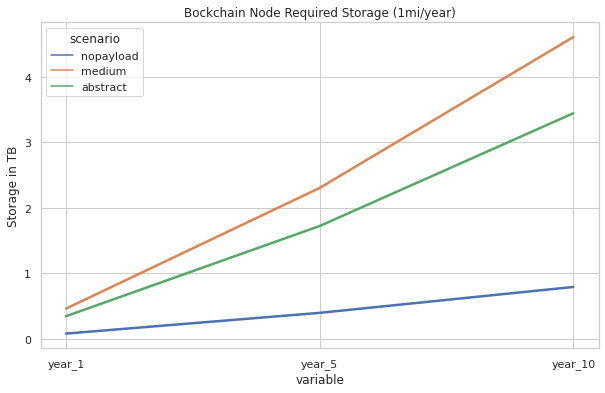

In [30]:
K_OBJ_YEAR = 1000000

df_m = pd.melt(gen_scenario(df_,K_OBJ_YEAR),id_vars=['scenario','record_length'])

f, ax = plt.subplots(figsize=(10, 6))
sns.set_theme(style="whitegrid")

g = sns.lineplot(df_m,x='variable',y='value',hue='scenario',linewidth = 2.5)
g.set_title("Bockchain Node Required Storage (1mi/year)")
ax.set(ylabel="Storage in TB")
# ax.set_yscale("log")

# data profile

In [31]:
df_s = pd.read_csv(RESULT_DIR + os.sep + 'no_payload' + os.sep + 'resultado_oasisbr_1_15000_16000.csv')
df_m = pd.read_csv(RESULT_DIR + os.sep + 'medium_payload' + os.sep + 'resultado_oasisbr_1_40000_41000.csv')
df_l = pd.read_csv(RESULT_DIR + os.sep + 'abstract_payload' + os.sep + 'resultado_oasisbr_1_22000_23000_abstract.csv')

df_s['scenario'] = 'no_payload'
df_m['scenario'] = 'medium_payload'
df_l['scenario'] = 'abstract_payload'

cdf = pd.concat([df_s,df_m,df_l])

In [32]:
cdf

,Unnamed: 0,id,payload_len,num_authors,num_topics,action,gas,time,scenario
0,0,IPEN_1d7ff384ff236a9662ef4fd64c43c41e,256,1,3,assingID,257542,1.526789,no_payload
1,1,IPEN_1d7ff384ff236a9662ef4fd64c43c41e,256,1,3,addSearchTerm,221133,2.128381,no_payload
2,2,IPEN_1d7ff384ff236a9662ef4fd64c43c41e,256,1,3,addSearchTerm,200291,1.869971,no_payload
3,3,IPEN_1d7ff384ff236a9662ef4fd64c43c41e,256,1,3,addSearchTerm,194815,2.046131,no_payload
4,4,IPEN_1d7ff384ff236a9662ef4fd64c43c41e,256,1,3,addExternalLink,166119,1.992036,no_payload
...,...,...,...,...,...,...,...,...,...
9820,9820,IPEN_ca40df1d18b7455de62d15037c3e4146,269,1,10,addSearchTerm,208119,1.969255,abstract_payload
9821,9821,IPEN_ca40df1d18b7455de62d15037c3e4146,269,1,10,addSearchTerm,215838,1.990858,abstract_payload
9822,9822,IPEN_ca40df1d18b7455de62d15037c3e4146,269,1,10,addSearchTerm,224336,2.094954,abstract_payload
9823,9823,IPEN_ca40df1d18b7455de62d15037c3e4146,269,1,10,addExternalLink,181427,1.882997,abstract_payload


In [33]:
# df_ = pd.melt(cdf[cdf.action == "setPayload"], id_vars=['id','scenario'], value_vars=['payload_len', 'num_authors', 'num_topics'])

cdf.action.unique()

array(['assingID', 'addSearchTerm', 'addExternalLink', 'setPayload'],
      dtype=object)

In [40]:
mdf

,id,variable,value
0,METO_e7cf1b2c5068a89ba43b7555e5d6adb2,payload_len,252
1,METO_db9a66a3416863c66fadac83b26333c1,payload_len,290
2,METO_b3efc4aeb3fa5ef10b3f71fd2b1c5243,payload_len,267
3,METO_95c1bdb568831875a7675d56ccd82113,payload_len,272
4,METO_0ddd319588e758d23922e8fd2dad845c,payload_len,303
...,...,...,...
5995,IPEN_9ee7217a27b97372a18e7779f4aa4d7b,num_topics,13
5996,IPEN_c7cb0f95ab333d23b2fc85c9b21b1b2e,num_topics,3
5997,IPEN_8cd541a7dfbdff7a66a1022317a28112,num_topics,6
5998,IPEN_e0220de4af4569f9f198b1b937df2e9a,num_topics,8


Text(0.5, 1.0, 'Payload length distribution')

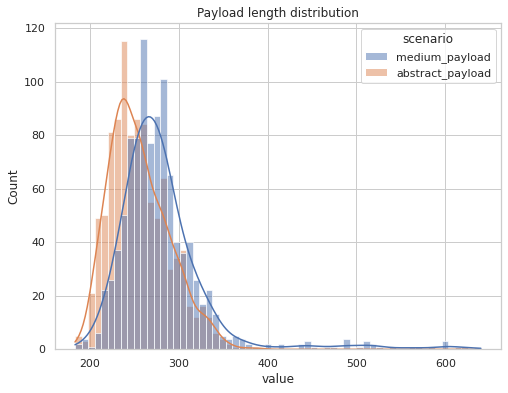

In [41]:
tdf = cdf[cdf.action == "setPayload"]
mdf = pd.melt(tdf, id_vars=['id','scenario'], value_vars=['payload_len', 'num_authors', 'num_topics'])

f, ax = plt.subplots(figsize=(8, 6))
g = sns.histplot(mdf[mdf.variable=='payload_len'],x='value', hue='scenario', kde=True)
g.set_title("Payload length distribution")


Text(0.5, 1.0, 'Number of key words per object')

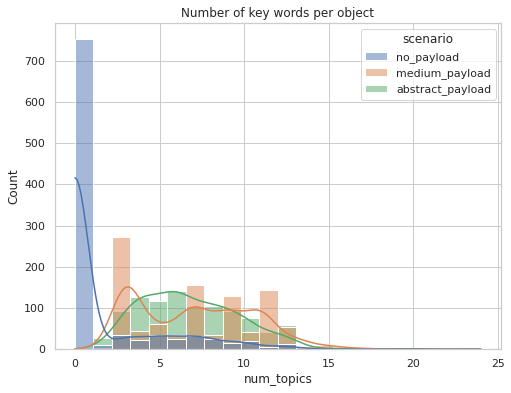

In [34]:
df_ = cdf[cdf.action == "assingID"]
f, ax = plt.subplots(figsize=(8, 6))
# g = sns.histplot(df_[df_.variable=='payload_len'],x='value', hue='scenario', kde=True)
g = sns.histplot(df_,x='num_topics', hue='scenario', kde=True)
g.set_title("Number of key words per object")

In [35]:
cdf.groupby('scenario').agg({'payload_len':['mean','std','max'],
                                'num_topics':['mean','std','max'],
                                'num_authors':['mean','std','max']
                                }).round(2)

payload_len                num_topics           num_authors  \
                        mean      std   max       mean   std max        mean   
scenario                                                                       
abstract_payload      257.12    33.86   389       7.72  3.18  24         1.0   
medium_payload        275.38    46.77   640       8.29  3.50  23         1.0   
no_payload           1117.94  1325.80  7982       4.32  4.38  19         1.0   

                           
                  std max  
scenario                   
abstract_payload  0.0   1  
medium_payload    0.0   1  
no_payload        0.0   1

## BC

In [42]:
def create_label(df,n_cluster,variable):
    diff = df[variable].max() - df[variable].min()
    scale = np.arange(df.gas.min(),df.gas.max(), diff/n_cluster)
    labels = []
    for i in range(n_cluster):
        if len(labels) == 0:
            labels.append(str(round(scale[i],0)) + " to " + str(round(scale[i+1],0)))
        else:
            if len(labels) < n_cluster-1:
                labels.append(str(round(scale[i],0)) + " to " + str(round(scale[i+1],0)))

    df['bins_'+variable] = pd.cut(df[variable], scale, labels=labels)
    return df

dfb = create_label(cdf,5,'gas')
# df = create_label(df,3,'time')

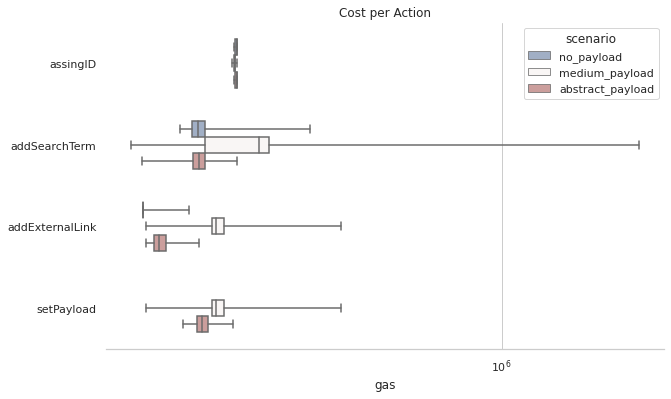

In [43]:
sns.set_theme(style="whitegrid")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10, 6))
ax.set_xscale("log")
ax.set_title("Cost per Action")

# Plot the orbital period with horizontal boxes
sns.boxplot(x="gas", y="action", data=dfb, hue='scenario',
            whis=[0, 100], 
            width=.6, palette="vlag")

# pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
# Add in points to show each observation
# sns.stripplot(x="gas", y="action", data=dfb,
#               size=4, 
#             #   color=".3", 
#               hue="bins_gas",
#               alpha=0.3,
#               # palette=,
#               linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
# sns.despine(trim=True, left=True)
sns.despine(left=True)

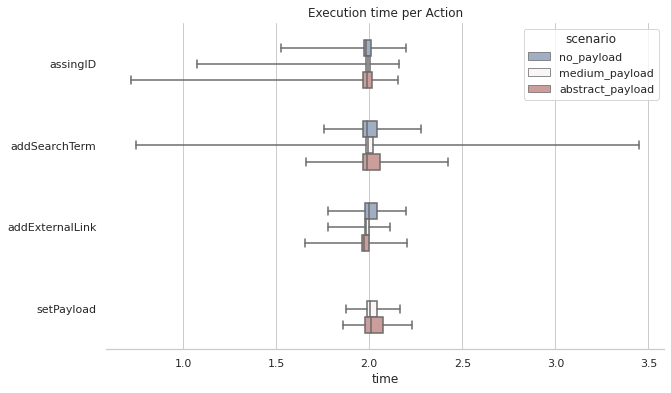

In [44]:
sns.set_theme(style="whitegrid")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10, 6))
# ax.set_xscale("log")
ax.set_title("Execution time per Action")

# Plot the orbital period with horizontal boxes
sns.boxplot(x="time", y="action", data=dfb, hue='scenario',
            whis=[0, 100], 
            width=.6, palette="vlag")

# pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
# Add in points to show each observation
# sns.stripplot(x="time", y="action", data=df,
#               size=4, 
#               color=".3", 
#             #   hue="bins_gas",
#               alpha=0.3,
#               # palette=,
#               linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
# sns.despine(trim=True, left=True)
sns.despine(left=True)

sss

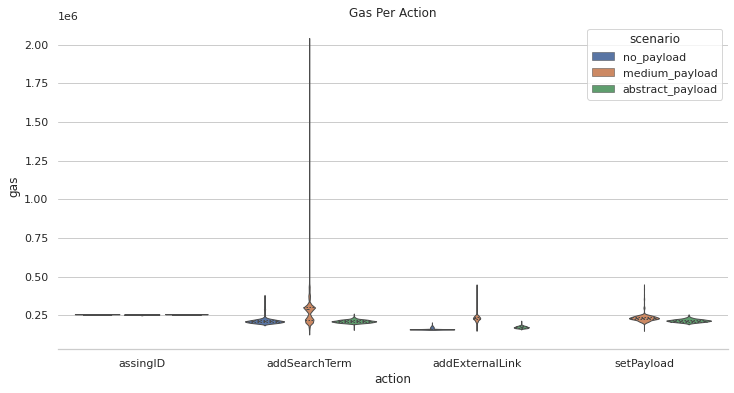

In [50]:
target = "gas" # time

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(12, 6))
# ax.set_xscale("log")
ax.set_title("Gas Per Action")

pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
sns.set_theme(style="whitegrid")

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(data=dfb, x="action", y=target, hue='scenario',
               # split=True, 
               inner="quart", linewidth=1,
               # palette=pal
            #    palette={"Yes": "b", "No": ".85"}
            )
sns.despine(left=True)
# ax.set_yscale("log")

